In [5]:
import pyemu
import os
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import shutil
import numpy as np
import sys

In [6]:
sys.path.insert(1, 'D:/spark/gits/apexmf')

In [11]:
from apexmf import apexmf_pst_viz

In [7]:
wd = "D:/spark/animas_amrs"
os.chdir(wd)

In [8]:
t_d = os.path.join(wd, "ies_template_pp")

In [27]:
# test run
pyemu.os_utils.run("pestpp-ies animas_amrs_pp.pst",cwd=t_d)

In [25]:
# reweight
pst = pyemu.Pst(os.path.join(t_d,'animas_amrs_rw.pst'))
pst.phi


2600000.0000139996

In [57]:
balanced_groups = {grp:100000 for grp in pst.nnz_obs_groups}
# print(pst.phi) #assumes "my.res" is colocated with "my.pst"
pst.adjust_weights(obsgrp_dict=balanced_groups)

In [58]:
obs = pst.observation_data.copy()
obs.to_csv('test_obs.csv')

In [61]:
obs.to_csv('test_obs.csv')

In [62]:
pst.write(os.path.join(t_d,'animas_amrs_rw.pst'))

noptmax:0, npar_adj:335, nnz_obs:2734


In [5]:
# org_t_d = os.path.join("master_glm_1")
# if not os.path.exists(org_t_d):
#     raise Exception("you need to run the '/part2_04_glm/freyberg_glm_1.ipynb' notebook")

# if os.path.exists(t_d):
#     shutil.rmtree(t_d)
# shutil.copytree(org_t_d,t_d)

In [5]:
num_workers = psutil.cpu_count(logical=False)

In [5]:
m_d = os.path.join('main_ies_1_pp')

In [ ]:
pyemu.os_utils.start_workers(t_d, # the folder which contains the "template" PEST dataset
                            'pestpp-ies', #the PEST software version we want to run
                            'animas_amrs_rw_pp.pst', # the control file to use with PEST
                            num_workers=num_workers, #how many agents to deploy
                            worker_root='.', #where to deploy the agent directories; relative to where python is running
                            master_dir=m_d, #the manager directory
                            )

In [6]:
pst = pyemu.Pst(os.path.join(m_d,'animas_amrs_rw_pp.pst'))

In [7]:
pr_oe = pyemu.ObservationEnsemble.from_csv(
    pst=pst,filename=os.path.join(m_d,"animas_amrs_rw_pp.0.obs.csv")
    )
pt_oe = pyemu.ObservationEnsemble.from_csv(pst=pst,filename=os.path.join(m_d,"animas_amrs_rw_pp.{0}.obs.csv".format(pst.control_data.noptmax)))


<Figure size 800x1050 with 0 Axes>

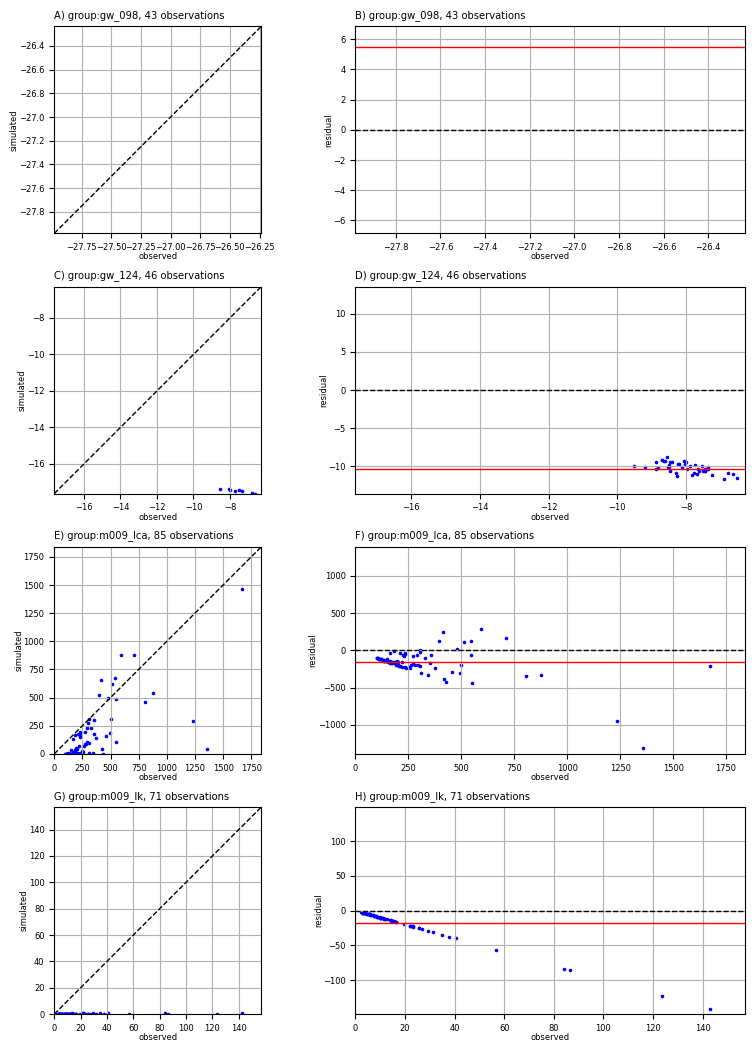

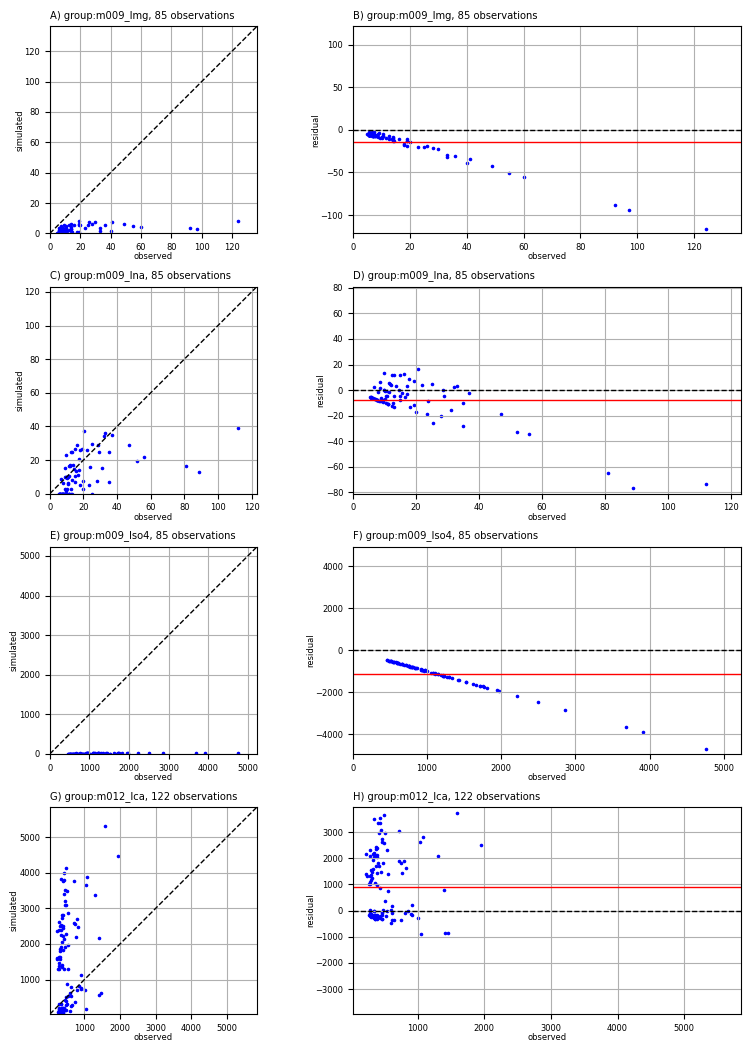

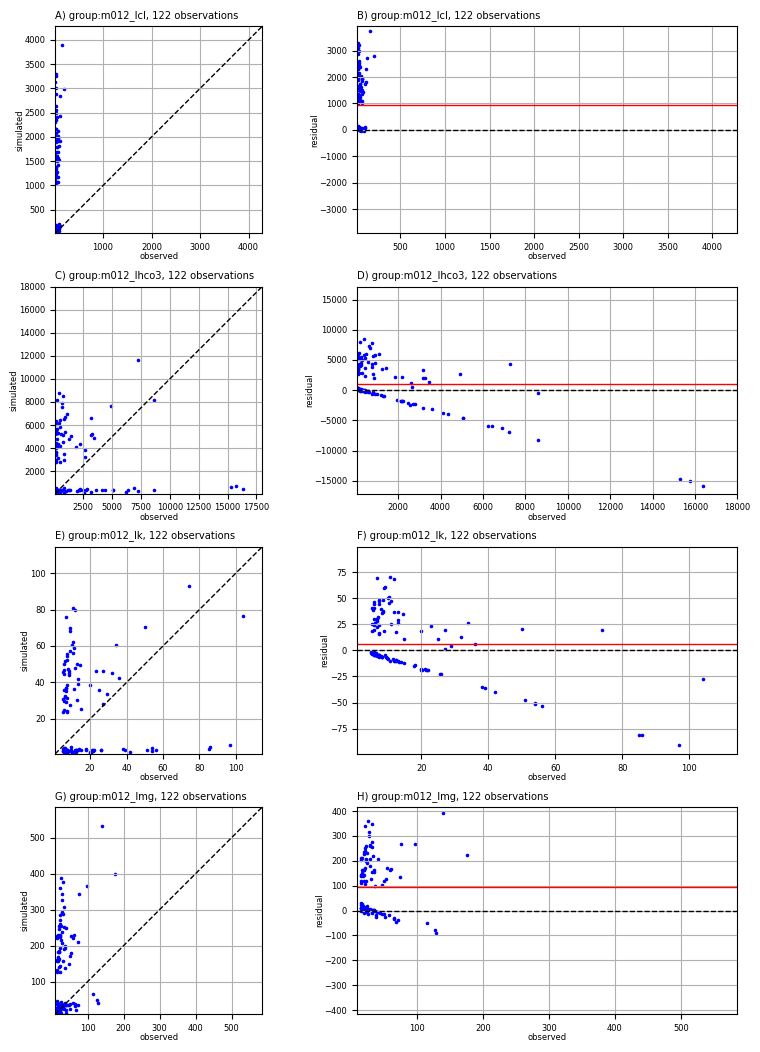

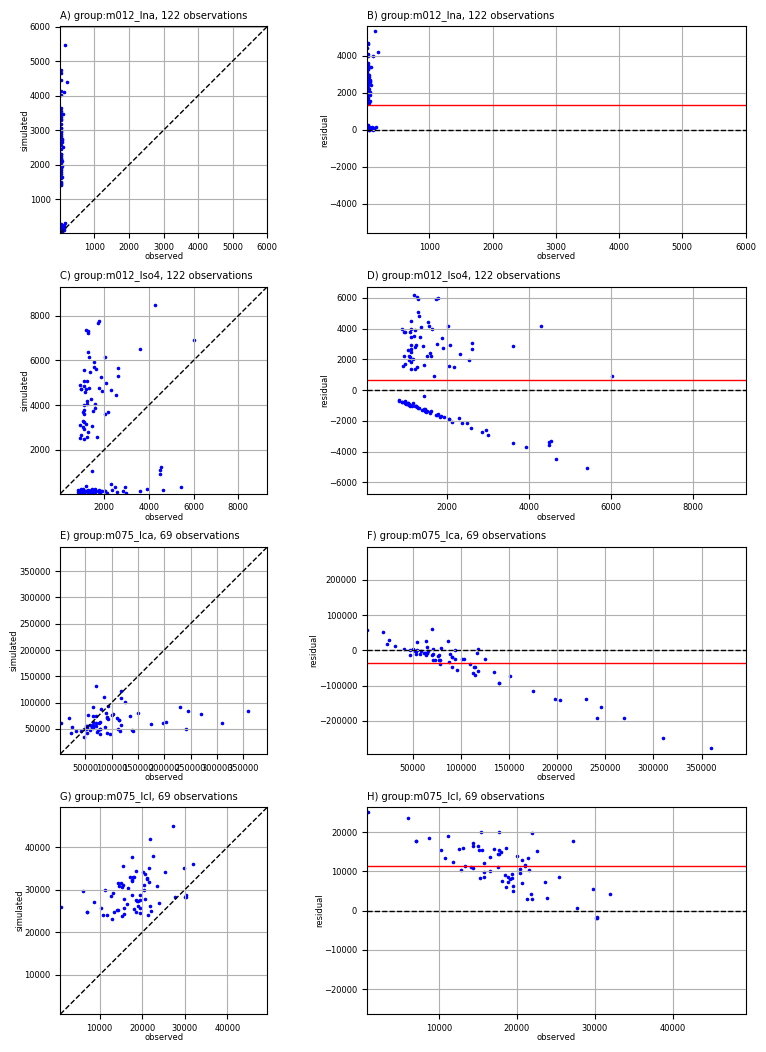

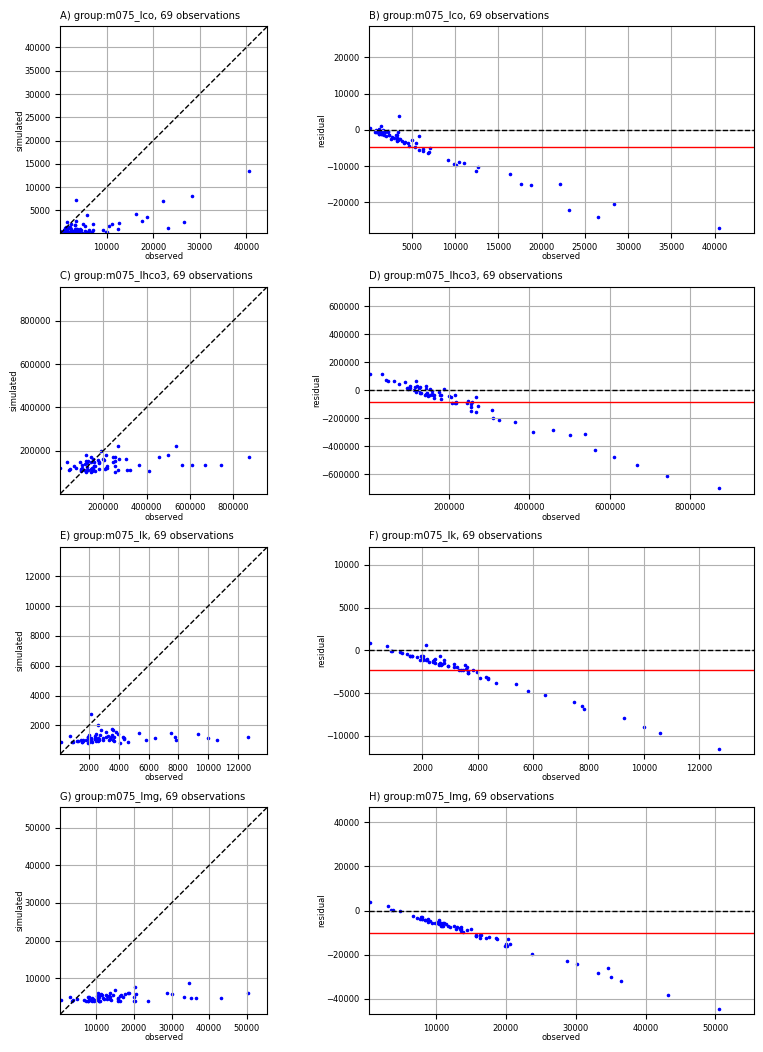

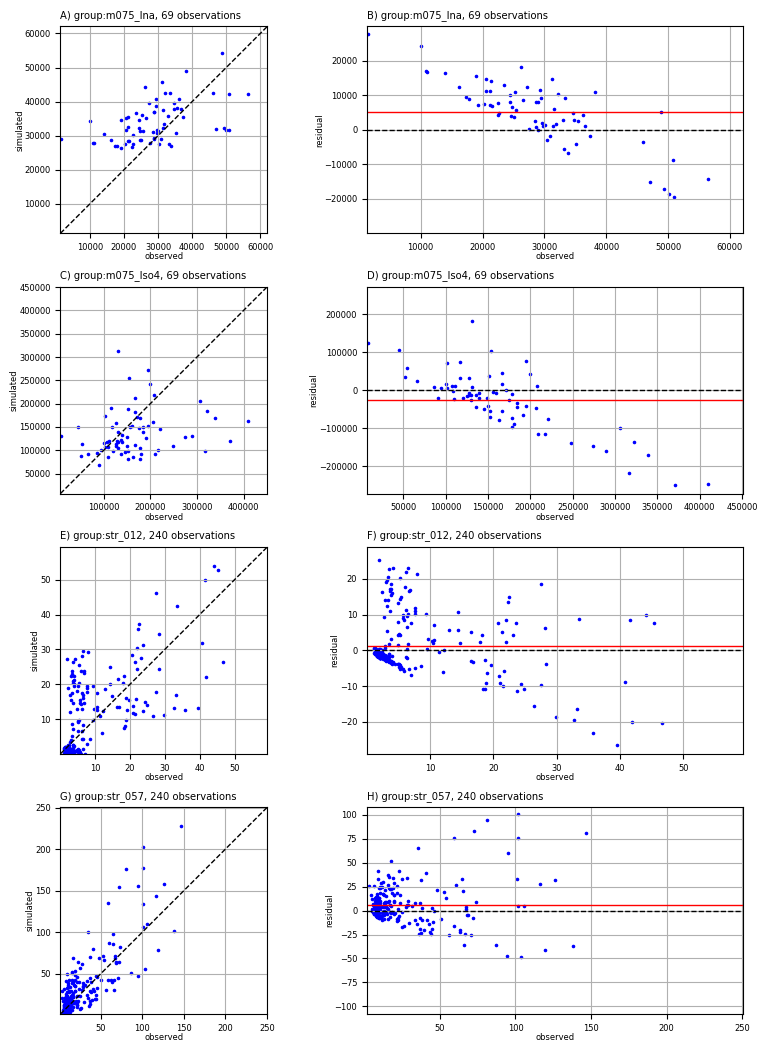

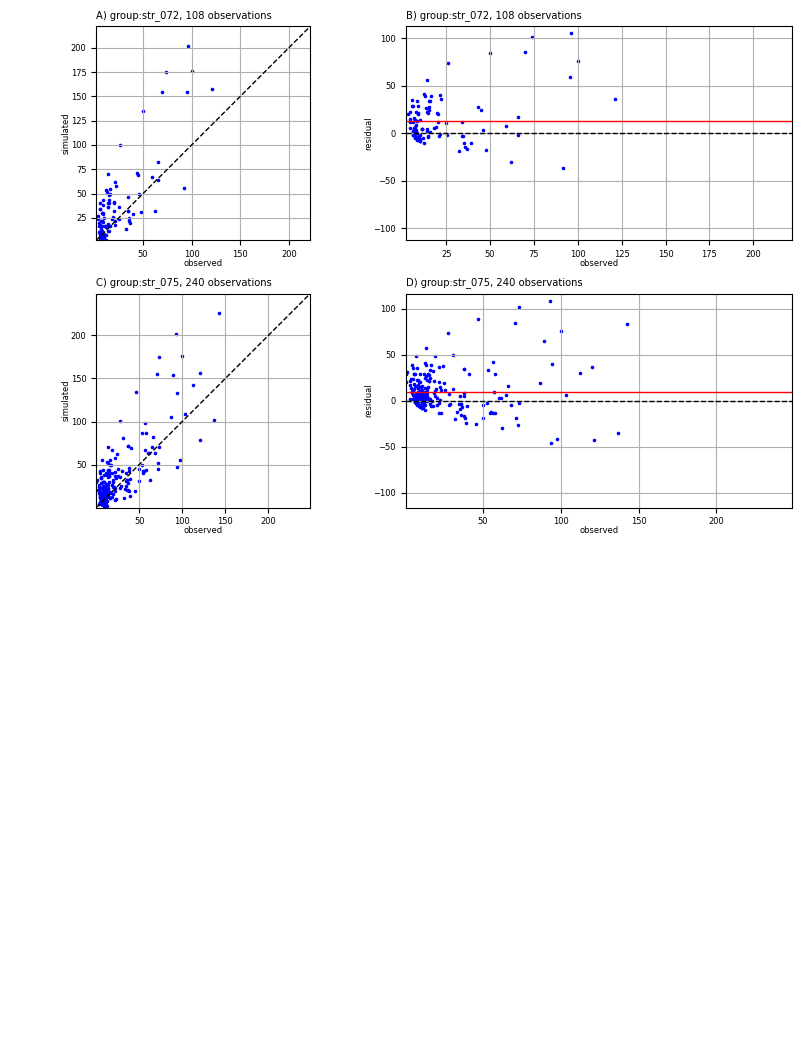

In [9]:
pyemu.plot_utils.res_1to1(pst);

In [10]:
pt_oe.phi_vector

real_name
1       2.808840e+06
2       2.938794e+06
3       3.273335e+06
6       1.912209e+06
8       2.954355e+06
            ...     
295     2.780324e+06
296     1.976515e+06
297     2.372430e+06
298     3.299322e+06
base    2.197930e+06
Length: 232, dtype: float64

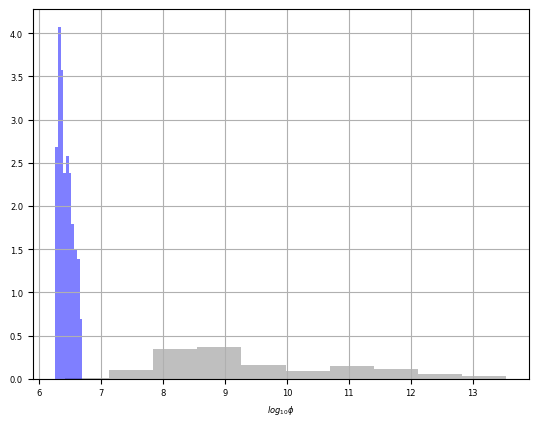

In [11]:
fig,ax = plt.subplots(1,1)
pr_oe.phi_vector.apply(np.log10).hist(ax=ax,fc="0.5",ec="none",alpha=0.5,density=True)
pt_oe.phi_vector.apply(np.log10).hist(ax=ax,fc="b",ec="none",alpha=0.5,density=True)
_ = ax.set_xlabel("$log_{10}\\phi$")

In [17]:
obs = obs.loc[obs.obgnme.apply(lambda x: x in pst.nnz_obs_groups),:]

In [18]:
obs

obsnme  obsval    weight    obgnme  oname  otype   
obsnme                                                                       
m009_lca_199201  m009_lca_199201  104.00  0.129022  m009_lca    NaN    NaN  \
m009_lca_199203  m009_lca_199203  114.00  0.129022  m009_lca    NaN    NaN   
m009_lca_199204  m009_lca_199204  232.00  0.129022  m009_lca    NaN    NaN   
m009_lca_199205  m009_lca_199205  480.00  0.129022  m009_lca    NaN    NaN   
m009_lca_199206  m009_lca_199206  457.00  0.129022  m009_lca    NaN    NaN   
...                          ...     ...       ...       ...    ...    ...   
str_075_201108    str_075_201108    7.72  0.884858   str_075    NaN    NaN   
str_075_201109    str_075_201109    5.67  0.884858   str_075    NaN    NaN   
str_075_201110    str_075_201110    9.58  0.884858   str_075    NaN    NaN   
str_075_201111    str_075_201111   10.83  0.884858   str_075    NaN    NaN   
str_075_201112    str_075_201112    7.76  0.884858   str_075    NaN    NaN   

                 usecol  time   i   j  totim  
obsnme                                        
m009_lca_199201     NaN   NaN NaN NaN    NaN  
m009_lca_199203     NaN   NaN NaN NaN    NaN  
m009_lca_199204     NaN   NaN NaN NaN    NaN  
m009_lca_199205     NaN   NaN NaN NaN    NaN  
m009_lca_199206     NaN   NaN NaN NaN    NaN  
...                 ...   ...  ..  ..    ...  
str_075_201108      NaN   NaN NaN NaN    NaN  
str_075_201109      NaN   NaN NaN NaN    NaN  
str_075_201110      NaN   NaN NaN NaN    NaN  
str_075_201111      NaN   NaN NaN NaN    NaN  
str_075_201112      NaN   NaN NaN NaN    NaN  

[2734 rows x 11 columns]

In [16]:
pst.nnz_obs_groups

['m009_lca',
 'm009_lk',
 'm009_lmg',
 'm009_lna',
 'm009_lso4',
 'm012_lca',
 'm012_lcl',
 'm012_lhco3',
 'm012_lk',
 'm012_lmg',
 'm012_lna',
 'm012_lso4',
 'm075_lca',
 'm075_lcl',
 'm075_lco',
 'm075_lhco3',
 'm075_lk',
 'm075_lmg',
 'm075_lna',
 'm075_lso4',
 'gw_098',
 'gw_124',
 'str_012',
 'str_057',
 'str_072',
 'str_075']

In [20]:
def plot_tseries_ensembles(
                    pr_oe, pt_oe, dot=True,
#                     onames=["hds","sfr"]
                    ):
    pst.try_parse_name_metadata()
    # get the observation data from the control file and select 
    obs = pst.observation_data.copy()
    obs = obs.loc[obs.obgnme.apply(lambda x: x in pst.nnz_obs_groups),:]
    time_col = []
    for i in range(len(obs)):
        time_col.append(obs.iloc[i, 0][-6:])
    obs.time = time_col
#     # onames provided in oname argument
#     obs = obs.loc[obs.oname.apply(lambda x: x in onames)]
    # only non-zero observations
#     obs = obs.loc[obs.obgnme.apply(lambda x: x in pst.nnz_obs_groups),:]
    # make a plot
    ogs = obs.obgnme.unique()
    fig,axes = plt.subplots(len(ogs),1,figsize=(10,4*len(ogs)))
    ogs.sort()
    # for each observation group (i.e. timeseries)
    for ax,og in zip(axes,ogs):
        # get values for x axis
        oobs = obs.loc[obs.obgnme==og,:].copy()
        oobs.loc[:,"time"] = oobs.time.astype(str)
#         oobs.sort_values(by="time",inplace=True)
        tvals = oobs.time.values
        onames = oobs.obsnme.values
        if dot is True:
            # plot prior
            [ax.scatter(tvals,pr_oe.loc[i,onames].values,color="gray",s=30, alpha=0.5) for i in pr_oe.index]
            # plot posterior
            [ax.scatter(tvals,pt_oe.loc[i,onames].values,color='b',s=30,alpha=0.2) for i in pt_oe.index]
            # plot measured+noise 
            oobs = oobs.loc[oobs.weight>0,:]
            tvals = oobs.time.values
            onames = oobs.obsnme.values
    #         [ax.plot(tvals,noise.loc[i,onames].values,"r",lw=0.5,alpha=0.5) for i in noise.index]
            ax.scatter(oobs.time,oobs.obsval,color='red',s=30).set_facecolor("none")
        if dot is False:
            # plot prior
            [ax.plot(tvals,pr_oe.loc[i,onames].values,"0.5",lw=0.5,alpha=0.5) for i in pr_oe.index]
            # plot posterior
            [ax.plot(tvals,pt_oe.loc[i,onames].values,"b",lw=0.5,alpha=0.5) for i in pt_oe.index]
            # plot measured+noise 
            oobs = oobs.loc[oobs.weight>0,:]
            tvals = oobs.time.values
            onames = oobs.obsnme.values
    #         [ax.plot(tvals,noise.loc[i,onames].values,"r",lw=0.5,alpha=0.5) for i in noise.index]
            ax.plot(oobs.time,oobs.obsval,"r-",lw=2)
        ax.tick_params(axis='x', labelrotation=90)
        ax.margins(x=0.01)
        ax.set_title(og,loc="left")
    fig.tight_layout()
    return fig

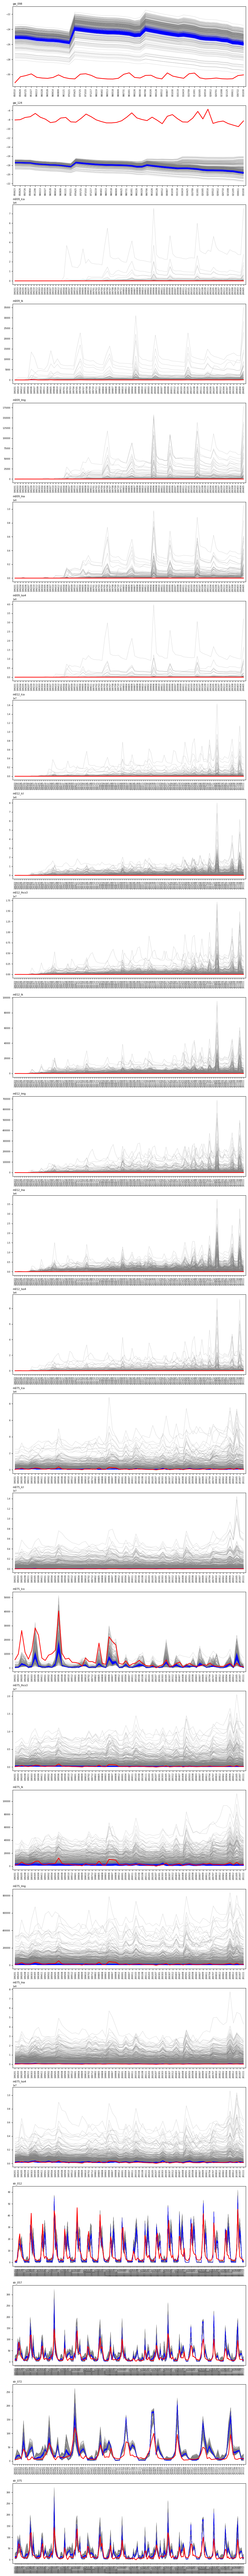

In [22]:
fig = plot_tseries_ensembles(pr_oe, pt_oe, dot=False)

In [45]:
os.getcwd()

'D:\\spark\\animas_amrs\\main_ies_1_only_mld'

In [47]:
pst.parrep(parfile=os.path.join('animas_amrs_pp.7.base.par'))

Updating parameter values from animas_amrs_pp.7.base.par
parrep: updating noptmax to 0


In [26]:
# updates the model input files with parameter values
pst.write_input_files(pst_path=m_d)

In [35]:
m_d

'main_ies_1_only_mld'

In [37]:
# run the model forward run; this applies all the multipler paarameters, executes MODFLOW6 and MODPATH7 and then postprocess observations
pyemu.os_utils.run('python salt_forward_run.py')

In [ ]:
5895, 6273

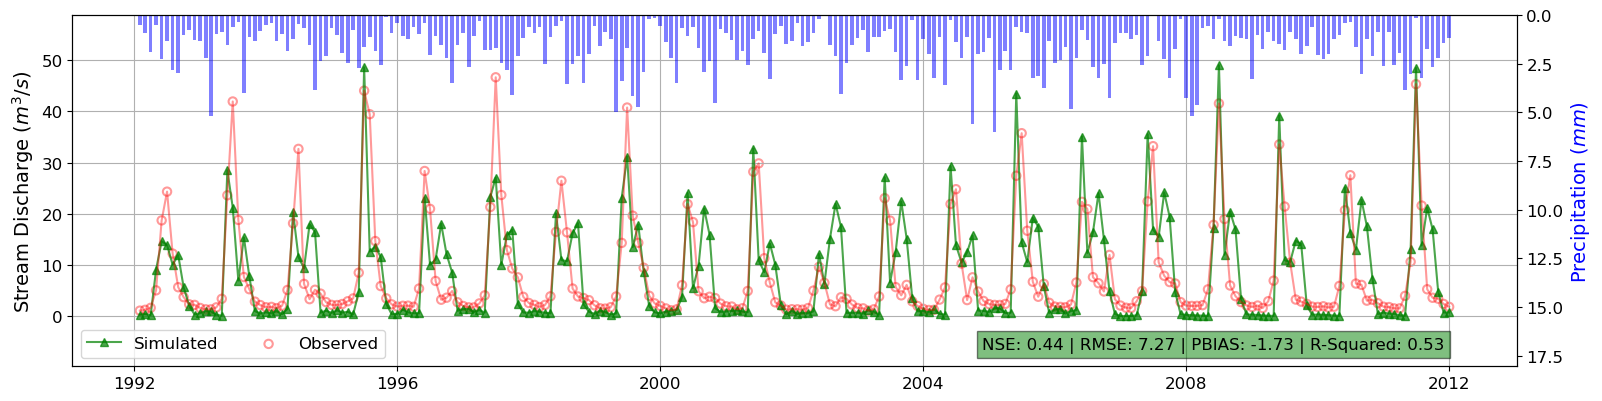

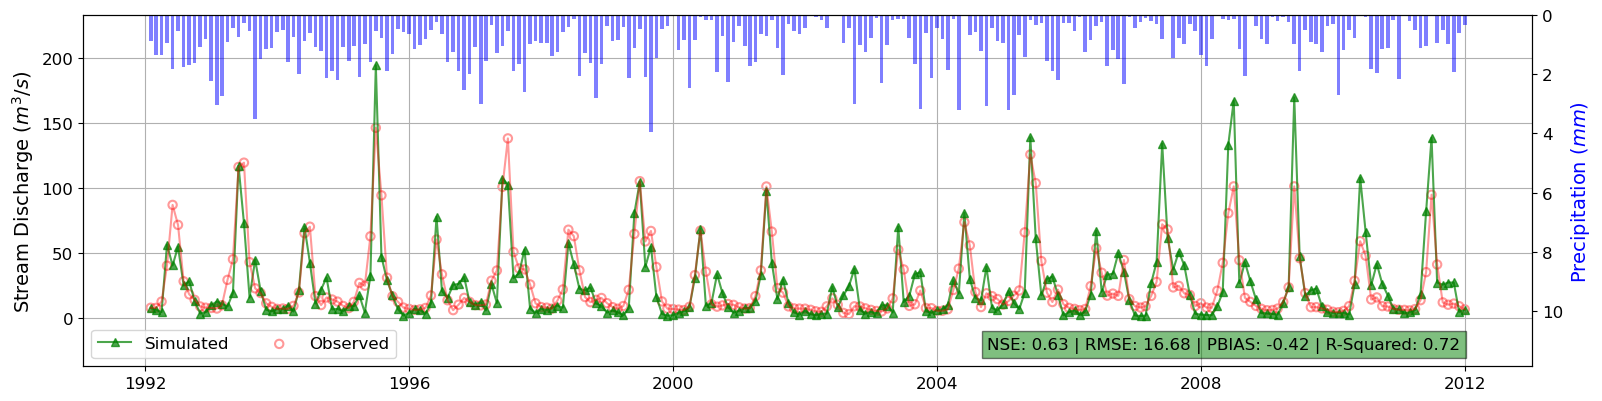

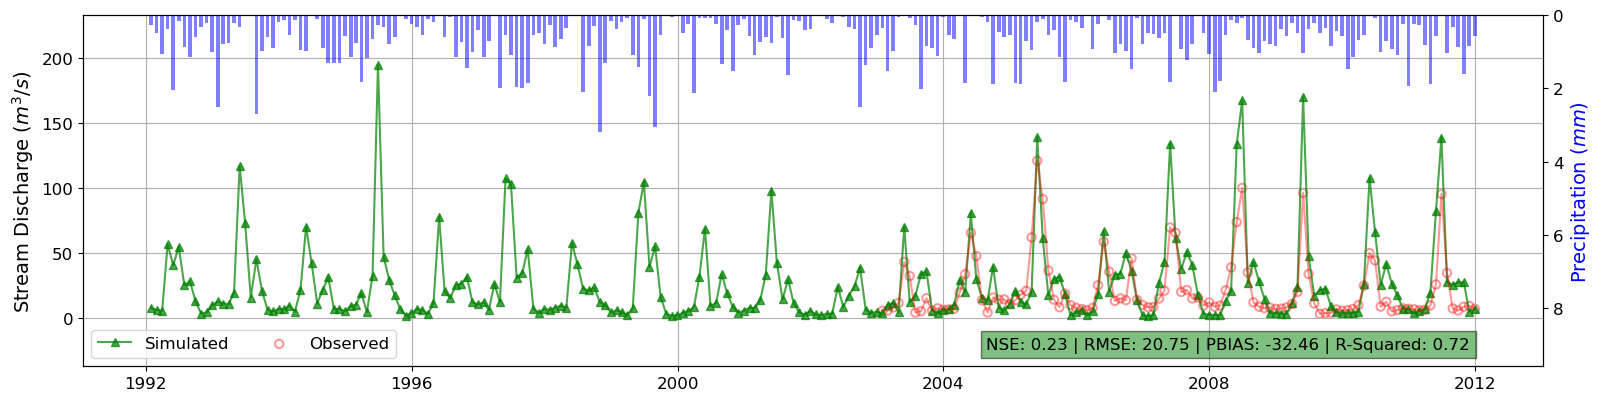

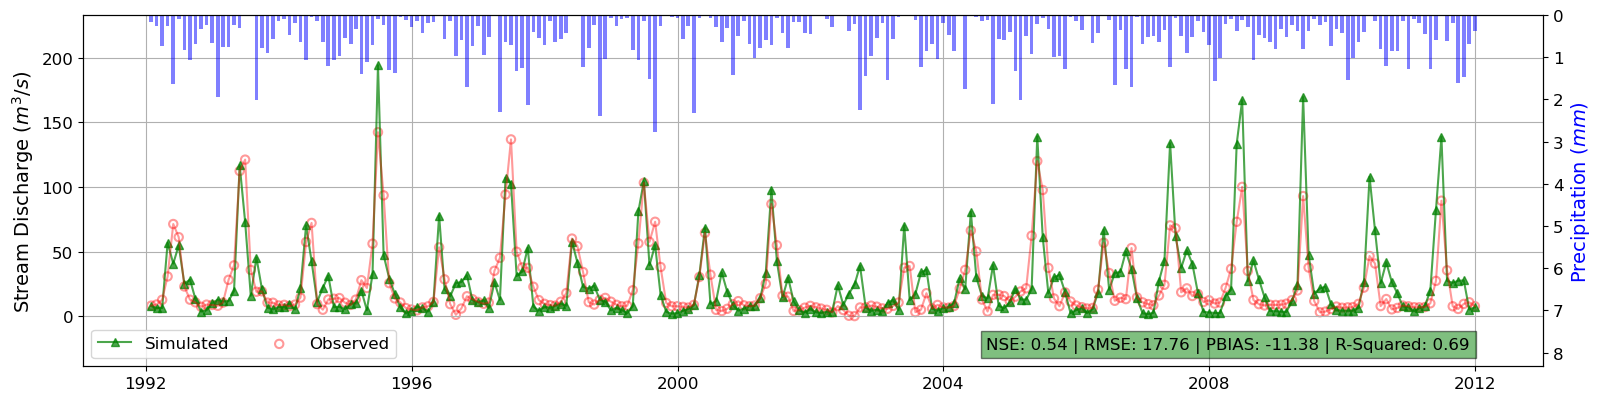

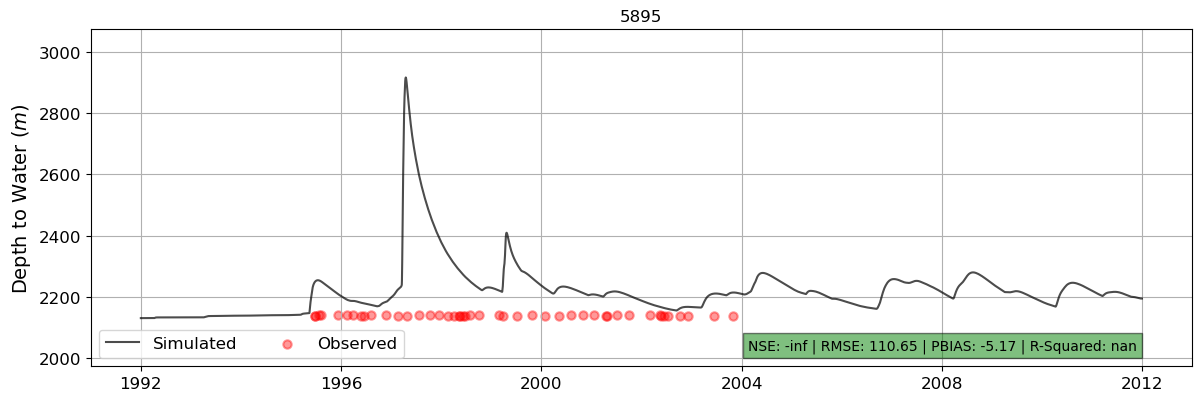

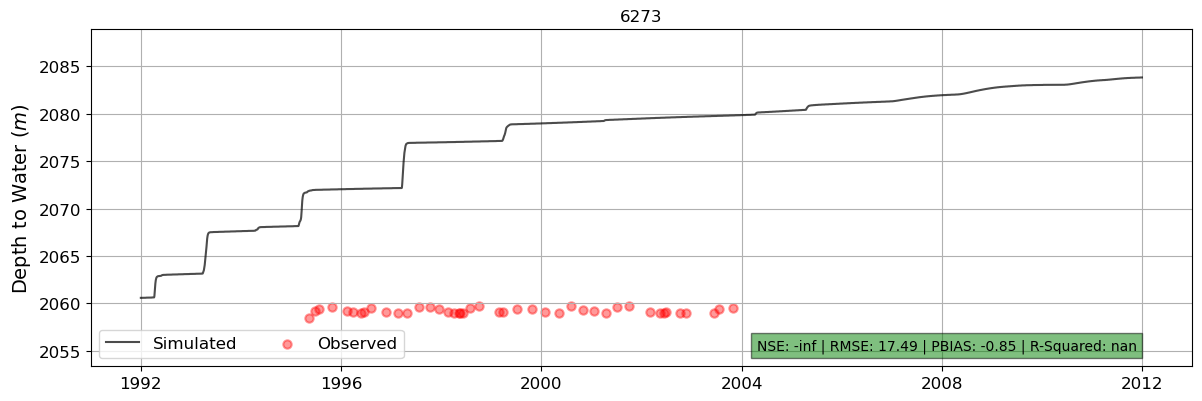

In [30]:
# wd = 'D:/Projects/Watersheds/White/Analysis/APEX-MODFLOWs/calibration/v02_calibrated'
os.chdir(t_d)
str_dic = {12:'str_012', 57:'str_057', 72:'str_072', 75:'str_075'}
for sim, obd in str_dic.items():
    pdf = apexmf_pst_viz.stf_df('SITE75.RCH', '1/1/1987', sim, obd, time_step='M')
    apexmf_pst_viz.stf_plot(pdf['1/1/1992':'12/31/2011'])
#     apexmf_pst_viz.str_plot(pdf['1/1/2010':'12/31/2019'])
mf_dic = {5895:'wt_gw_124', 6273:'wt_gw_098'}
for sim, obd in mf_dic.items():
    mfdf = apexmf_pst_viz.wt_df('1/1/1987', sim, obd, prep_sub=75)
    # apexmf_pst_viz.wt_plot(mfdf['1/1/2010':'12/31/2019'])
    apexmf_pst_viz.wt_plot(mfdf['1/1/1992':'12/31/2011'])